In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('C:/Users/Administrator/Desktop/kaggle/Titanic/train.csv',encoding = "gbk")
df_test = pd.read_csv('C:/Users/Administrator/Desktop/kaggle/Titanic/test.csv',encoding="gbk")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


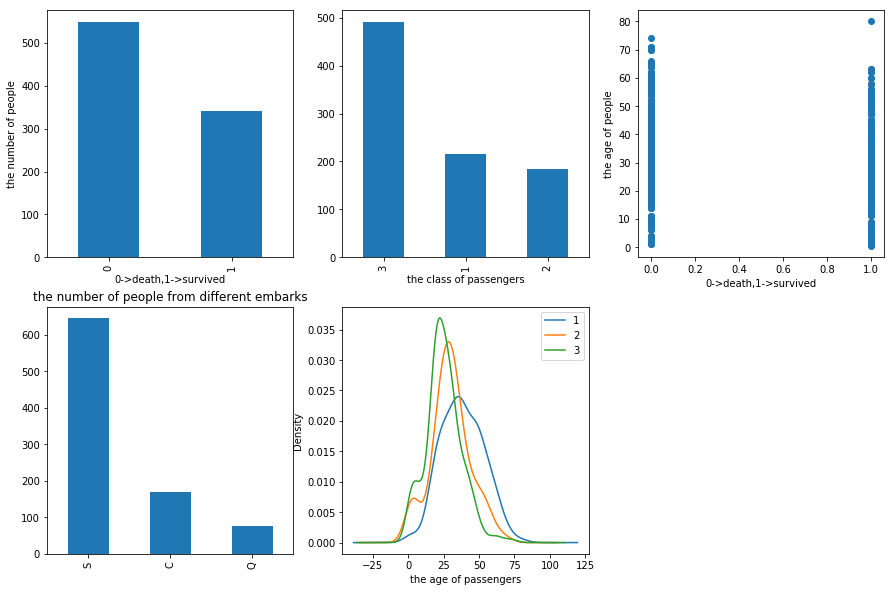

In [6]:
#属性之间的饿分布
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,3,1)
df_train["Survived"].value_counts().plot(kind="bar")
ax.set_ylabel("the number of people")
ax.set_xlabel("0->death,1->survived")

ax1 = fig.add_subplot(2,3,2)
df_train["Pclass"].value_counts().plot(kind="bar")
ax1.set_xlabel("the class of passengers")

ax2 = fig.add_subplot(233)
ax2.scatter(df_train["Survived"],df_train["Age"])
ax2.set_xlabel("0->death,1->survived")
ax2.set_ylabel("the age of people")

ax3 = fig.add_subplot(234)
df_train["Embarked"].value_counts().plot(kind="bar")
ax3.set_title("the number of people from different embarks")

ax4 = fig.add_subplot(235)
df_train.Age[df_train.Pclass == 1].plot("kde")
df_train.Age[df_train.Pclass == 2].plot("kde")
df_train.Age[df_train.Pclass == 3].plot("kde")
ax4.legend(('1','2','3'),loc=1)
ax4.set_xlabel("the age of passengers")

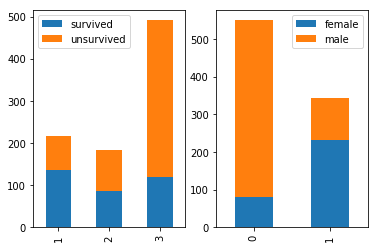

In [7]:
#属性与结果的分布
fig = plt.figure()

ax = fig.add_subplot(121)
survived = df_train.Pclass[df_train.Survived == 1].value_counts()
unsurvived = df_train.Pclass[df_train.Survived == 0].value_counts()
df_Pclass_dict = pd.DataFrame({"survived":survived,"unsurvived":unsurvived})
df_Pclass_dict.plot(kind="bar",ax=ax,stacked=True)
ax.legend(loc="best")

ax1 = fig.add_subplot(122)
sur = df_train.Survived[df_train.Sex=="male"].value_counts()
unsur = df_train.Survived[df_train.Sex=="female"].value_counts()
df_Sex_dict = pd.DataFrame({"male":sur,"female":unsur})
df_Sex_dict.plot(kind="bar",stacked=True,ax=ax1)
ax1.legend(loc="best")

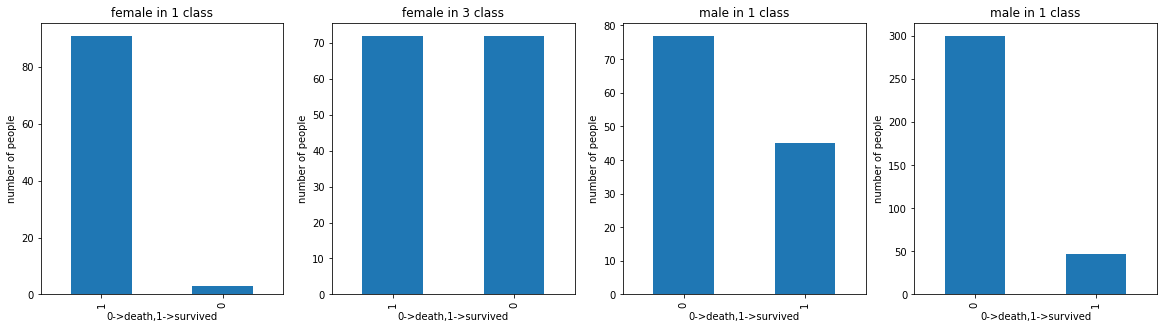

In [8]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(141)
df_train.Survived[df_train["Pclass"]==1][df_train["Sex"]=="female"].value_counts().plot(kind="bar")
ax1.set_xlabel("0->death,1->survived")
ax1.set_ylabel("number of people")
ax1.set_title("female in 1 class")

ax2 = fig.add_subplot(143)
df_train.Survived[df_train["Pclass"]==1][df_train["Sex"]=="male"].value_counts().plot(kind="bar")
ax2.set_xlabel("0->death,1->survived")
ax2.set_ylabel("number of people")
ax2.set_title("male in 1 class")

ax3 = fig.add_subplot(142)
df_train.Survived[df_train["Pclass"]==3][df_train["Sex"]=="female"].value_counts().plot(kind="bar")
ax3.set_xlabel("0->death,1->survived")
ax3.set_ylabel("number of people")
ax3.set_title("female in 3 class")

ax4 = fig.add_subplot(144)
df_train.Survived[df_train["Pclass"]==3][df_train["Sex"]=="male"].value_counts().plot(kind="bar")
ax4.set_xlabel("0->death,1->survived")
ax4.set_ylabel("number of people")
ax4.set_title("male in 1 class")

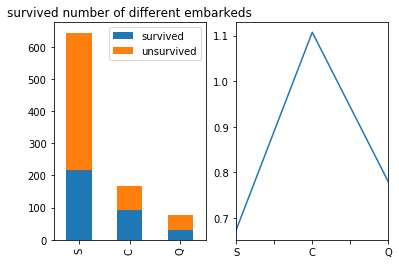

In [9]:
fig = plt.figure()
ax = fig.add_subplot(121)
sur_emb = df_train.Embarked[df_train.Survived==1].value_counts()
unsur_emb = df_train.Embarked[df_train.Survived==0].value_counts()
df_embarked = pd.DataFrame({"survived":sur_emb,"unsurvived":unsur_emb})
df_embarked.plot(kind="bar",ax=ax,stacked=True)
ax.legend(loc="best")
ax.set_title("survived number of different embarkeds")

ax1 = fig.add_subplot(122)
list_survived_radio = df_embarked["survived"]/ df_embarked.mean(axis=1)
list_survived_radio.plot(ax=ax1)


In [10]:
df_train.head()
Si_df = df_train.groupby(["SibSp","Survived"])[["PassengerId"]].count()
Si_df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [11]:
Pa_df = df_train.groupby(["Parch","Survived"])[["PassengerId"]].count()
Pa_df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

In [12]:
df_train["Cabin"].value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

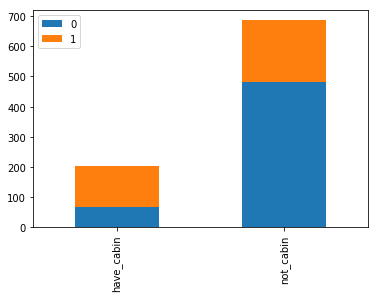

In [13]:
df_train.head()
fig = plt.figure()
ax = fig.add_subplot(111)
have_cabin = df_train.Survived[df_train["Cabin"].notnull()].value_counts()
not_cabin = df_train.Survived[df_train["Cabin"].isnull()].value_counts()
df_cabin = pd.DataFrame({"have_cabin":have_cabin,"not_cabin":not_cabin}).T
df_cabin.plot(kind="bar",ax=ax,stacked=True)
ax.legend(loc="best")

In [14]:
#处理Age
from sklearn.ensemble import RandomForestRegressor

def age_predict(df):
    #总体的数据
    df_all = df[['Pclass','SibSp','Parch',"Fare","Age"]]
    #训练集和预测集
    df_x_train = df_all[df_all["Age"].notnull()].iloc[:,:4]
    df_x_test = df_all[df_all["Age"].isnull()].iloc[:,:4]
    df_y_train = df_all[df_all["Age"].notnull()]["Age"]
    #预测数据集
    RFR = RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)
    RFR.fit(df_x_train,df_y_train)
    df_y_test = RFR.predict(df_x_test)
    #填充缺失值
    df.loc[df.Age.isnull(),"Age"] = df_y_test
    
    return df,RFR

def set_cabin(df):
    df.loc[df.Cabin.isnull(),"Cabin"] = "no"
    df.loc[df.Cabin.notnull(),"Cabin"] = "yes"
    return df    

df_train,RFR = age_predict(df_train)


In [15]:
#特征哑变量
df_Pclass = pd.get_dummies(df_train["Pclass"],prefix="Pclass")
df_Sex = pd.get_dummies(df_train["Sex"],prefix="Sex")
df_Cabin = pd.get_dummies(df_train["Cabin"],prefix="Cabin")
df_Embarked = pd.get_dummies(df_train["Embarked"],prefix="Embarked")

df_combine = pd.concat([df_train,df_Pclass,df_Sex,df_Cabin,df_Embarked],axis=1)
df_combine.drop(["Pclass","Sex","Cabin","Embarked","Ticket","Name","PassengerId"],axis=1,inplace=True)

In [16]:
#标准化
from sklearn.preprocessing import StandardScaler
Standard = StandardScaler()
df_combine["Age_scaler"] = Standard.fit_transform(df_combine["Age"])
df_combine["Fare_scaler"] = Standard.fit_transform(df_combine["Fare"])
df_combine.head(10)

C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Age_scaler,Fare_scaler
0,0,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.561988,-0.502445
1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.613637,0.786845
2,1,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.268081,-0.488854
3,1,35.000000,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.393207,0.420730
4,0,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.393207,-0.486337
5,0,23.952786,0,0,8.4583,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.418504,-0.478116
6,0,54.000000,0,0,51.8625,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.789261,0.395814
7,0,2.000000,3,1,21.0750,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.031518,-0.224083
8,1,27.000000,0,2,11.1333,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.194605,-0.424256
9,1,14.000000,1,0,30.0708,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.149800,-0.042956


In [17]:
df_combine.drop(["Age","Fare"],axis=1,inplace=True)
df_combine.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Age_scaler,Fare_scaler
0,0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.561988,-0.502445
1,1,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.613637,0.786845
2,1,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.268081,-0.488854
3,1,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.393207,0.420730
4,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.393207,-0.486337


In [18]:
from sklearn.linear_model import LogisticRegression
x = df_combine.ix[:,1:]
y = df_combine["Survived"]
logistic = LogisticRegression(tol = 1e-6)
logistic.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [19]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
from sklearn.learning_curve import learning_curve
logistic1 = LogisticRegression(tol=1e-6)
train_sizes,train_scores,test_scores=learning_curve(logistic1,X=x,y=y,train_sizes=np.linspace(0.1,1.0,10),cv=15,n_jobs=1)

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_std = np.std(test_scores,axis=1)

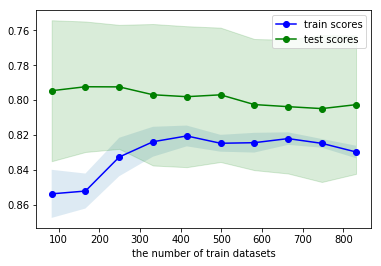

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(train_sizes,train_mean,'bo-',label="train scores")
ax.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15)
ax.plot(train_sizes,test_mean,'go-',label="test scores")
ax.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color="green")
ax.legend(loc="best")
ax.set_xlabel("the number of train datasets")
plt.gca().invert_yaxis()

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
log = Pipeline([
        ("log",LogisticRegression())
    ])
parameters = {
    "log__C":(0.001,0.01,0.1,1,10),
    "log__penalty":("l1","l2")
}
best_log = GridSearchCV(log,parameters,cv=10,n_jobs=1,verbose=1,scoring="f1")
best_log.fit(x,y)
best_log.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished


0.73888437017849029

In [23]:
inter_ = best_log.best_estimator_.get_params()

In [24]:
for name in parameters.keys():
    print name,inter_[name]

log__penalty l2
log__C 10


In [26]:
x.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Age_scaler,Fare_scaler
0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.561988,-0.502445
1,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.613637,0.786845
2,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.268081,-0.488854
3,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.393207,0.420730
4,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.393207,-0.486337


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,roc_curve,auc
from sklearn.cross_validation import train_test_split,cross_val_score
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.7,random_state=46)

In [50]:
#ID3算法
ID3 = DecisionTreeClassifier(criterion="entropy")
ID3.fit(train_x,train_y)

scores = cross_val_score(ID3,x,y,cv=5)
print "5次的准确率为： %s. 平均准确率为： %f." % (scores, np.mean(scores))

#精确度和召回率
precision = cross_val_score(ID3,x,y,cv=5,scoring="precision")
print "5次的精确率为： %s. 平均精确率为： %f." % (precision, np.mean(precision))

recall = cross_val_score(ID3,x,y,cv=5,scoring="recall")
print "5次的召回率为： %s. 平均召回率为： %f." % (recall, np.mean(recall))

#计算中和指标 f1
f1 = cross_val_score(ID3,x,y,cv=5,scoring="f1")
print "5次的综合指标为： %s. 平均综合指标为： %f." % (f1, np.mean(f1))

5次的准确率为： [ 0.75418994  0.7877095   0.80898876  0.76966292  0.84180791]. 平均准确率为： 0.792472.
5次的精确率为： [ 0.67123288  0.71830986  0.72        0.74545455  0.79104478]. 平均精确率为： 0.729208.
5次的召回率为： [ 0.68115942  0.73913043  0.79411765  0.61764706  0.77941176]. 平均召回率为： 0.722293.
5次的综合指标为： [ 0.69064748  0.72857143  0.76056338  0.68292683  0.78832117]. 平均综合指标为： 0.730206.


In [56]:
#ID3算法
CART = DecisionTreeClassifier(criterion="gini")
CART.fit(train_x,train_y)

scores = cross_val_score(CART,x,y,cv=5)
print "5次的准确率为： %s. 平均准确率为： %f." % (scores, np.mean(scores))

#精确度和召回率
precision = cross_val_score(CART,x,y,cv=5,scoring="precision")
print "5次的精确率为： %s. 平均精确率为： %f." % (precision, np.mean(precision))

recall = cross_val_score(CART,x,y,cv=5,scoring="recall")
print "5次的召回率为： %s. 平均召回率为： %f." % (recall, np.mean(recall))

#计算中和指标 f1
f1 = cross_val_score(CART,x,y,cv=5,scoring="f1")
print "5次的综合指标为： %s. 平均综合指标为： %f." % (f1, np.mean(f1))

5次的准确率为： [ 0.77094972  0.78212291  0.80898876  0.75280899  0.85875706]. 平均准确率为： 0.794725.
5次的精确率为： [ 0.67647059  0.72463768  0.73913043  0.72727273  0.80597015]. 平均精确率为： 0.734696.
5次的召回率为： [ 0.69565217  0.71014493  0.76470588  0.58823529  0.79411765]. 平均召回率为： 0.710571.
5次的综合指标为： [ 0.69565217  0.73529412  0.76258993  0.656       0.78518519]. 平均综合指标为： 0.726944.


In [54]:
#ID3算法
RF = RandomForestClassifier()
RF.fit(train_x,train_y)

scores = cross_val_score(RF,x,y,cv=5)
print "5次的准确率为： %s. 平均准确率为： %f." % (scores, np.mean(scores))

#精确度和召回率
precision = cross_val_score(RF,x,y,cv=5,scoring="precision")
print "5次的精确率为： %s. 平均精确率为： %f." % (precision, np.mean(precision))

recall = cross_val_score(RF,x,y,cv=5,scoring="recall")
print "5次的召回率为： %s. 平均召回率为： %f." % (recall, np.mean(recall))

#计算中和指标 f1
f1 = cross_val_score(RF,x,y,cv=5,scoring="f1")
print "5次的综合指标为： %s. 平均综合指标为： %f." % (f1, np.mean(f1))

5次的准确率为： [ 0.81005587  0.77653631  0.85393258  0.79775281  0.84745763]. 平均准确率为： 0.817147.
5次的精确率为： [ 0.75806452  0.75757576  0.76666667  0.82978723  0.8       ]. 平均精确率为： 0.782419.
5次的召回率为： [ 0.71014493  0.68115942  0.73529412  0.58823529  0.69117647]. 平均召回率为： 0.681202.
5次的综合指标为： [ 0.72058824  0.69565217  0.79699248  0.67226891  0.78461538]. 平均综合指标为： 0.734023.
